In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ast import literal_eval
% matplotlib inline

### Load predicted safety dataset.

In [2]:
ss = pd.read_csv('data/streetscore_newyorkcity.csv')

In [5]:
ss.shape

(322386, 3)

In [86]:
ss.to_csv('data/ss_cartodb_pred.csv', index = False)

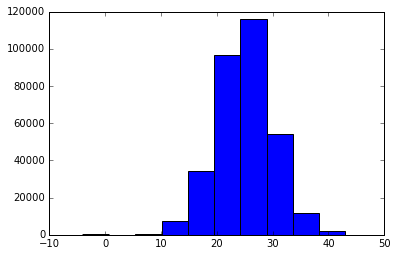

In [66]:
plt.hist(ss['q-score'])
plt.show()

### Load original dataset, which contains scores for safety, uniqueness, and upperclass.
* maximum q-score for each = 10; minimum q-score = 0

In [27]:
ss_orig = pd.read_json('data/streetscore_original.json')
ss_orig_nyc = ss_orig[ss_orig.City == 'New York City']

In [28]:
ss_orig_nyc.shape

(1705, 13)

In [29]:
ss_orig_nyc.head()

,City,Error in QS Safer,Error in QS Unique,Error in QS Upperclass,File_Location,Heading,ID,Lat,Lon,Pitch,QS Safer,QS Unique,QS Upperclass
2,New York City,0.58,0.8,0.61,/images/id_4026_400_300.jpg,7,4026,40.8259,-73.9249,5,4.96,3.79,5.44
3,New York City,0.41,0.74,0.61,/images/id_4027_400_300.jpg,335,4027,40.7875,-73.9528,10,6.94,6.66,5.87
4,New York City,0.58,0.7,0.6,/images/id_4024_400_300.jpg,356,4024,40.7728,-73.9584,12,6.36,6.29,6.47
5,New York City,0.54,0.86,0.63,/images/id_4025_400_300.jpg,7,4025,40.6887,-73.8402,8,4.85,4.67,5.08
6,New York City,0.61,0.82,0.59,/images/id_4022_400_300.jpg,19,4022,40.7743,-73.9096,5,6.7,4.59,5.23


In [43]:
def to_float(data):
    try:
        return float(data)
    except:
        return np.nan

In [46]:
def df_to_float(df):
    cols = ['QS Safer', 'QS Unique', 'QS Upperclass', 'Error in QS Safer', 'Error in QS Unique', 'Error in QS Upperclass']
    for c in cols:
        df.loc[:, c] = df.loc[:, c].apply(to_float)

In [47]:
df_to_float(ss_orig_nyc)

//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


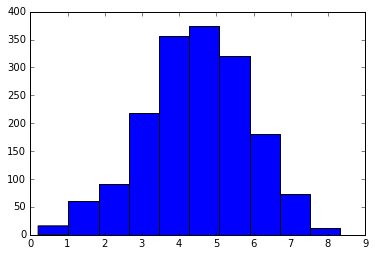

In [65]:
plt.hist(ss_orig_nyc['QS Safer'].dropna().values)
plt.show()

#### Export lat/long and ratings data to csv for CartoDB viz.

In [75]:
cdb = ss_orig_nyc.iloc[:, 7:]
cdb.drop('Pitch', axis = 1, inplace = True)

In [78]:
cdb.to_csv('data/ss_cartodb.csv', index = False)

### Load crime data.

In [80]:
crime = pd.read_csv('data/NYPD_7_Major_Felony_Incidents.csv')

Add latitude and longitude columns.

In [127]:
def get_lat(x):
    """Get latitude given tuple pair of (latitude, longitude)."""
    try:
        return x.translate(None, "'(),").split()[0]
    except:
        return x
    
def get_long(x):
    """Get longitude given tuple pair of (latitude, longitude)."""
    try:
        return x.translate(None, "'(),").split()[1]
    except:
        return x

In [124]:
crime['lat'] = crime['Location 1'].apply(get_lat)
crime['long'] = crime['Location 1'].apply(get_long)

In [172]:
crime.head()

,OBJECTID,Identifier,Occurrence Date,Day of Week,Occurrence Month,Occurrence Day,Occurrence Year,Occurrence Hour,CompStat Month,CompStat Day,...,Offense Classification,Sector,Precinct,Borough,Jurisdiction,XCoordinate,YCoordinate,Location 1,lat,long
938452,938453,fde2a04e,07/04/2015 09:30:00 AM,Saturday,Jul,4,2015,9,7,4,...,FELONY,D,48,BRONX,N.Y. POLICE DEPT,1014872,248381,"(40.8483786620001, -73.8893182859999)",40.8483786620001,-73.8893182859999
1019901,1019902,8480f691,02/07/2015 02:40:00 AM,Saturday,Feb,7,2015,2,2,7,...,FELONY,N,113,QUEENS,N.Y. POLICE DEPT,1049817,193240,"(40.696841261, -73.763548076)",40.696841261,-73.763548076
1019891,1019892,32f0496,02/07/2015 02:00:00 AM,Saturday,Feb,7,2015,2,2,8,...,FELONY,A,10,MANHATTAN,N.Y. POLICE DEPT,983690,209040,"(40.740451337, -74.002022288)",40.740451337,-74.002022288
1019892,1019893,3b3657c,02/07/2015 02:00:00 AM,Saturday,Feb,7,2015,2,2,7,...,FELONY,NaN,13,MANHATTAN,N.Y. POLICE DEPT,988874,207673,"(40.73669807, -73.983316026)",40.73669807,-73.983316026
1019893,1019894,5657e37f,02/07/2015 02:05:00 AM,Saturday,Feb,7,2015,2,2,7,...,FELONY,H,83,BROOKLYN,N.Y. POLICE DEPT,1008918,194147,"(40.699539271, -73.91103807)",40.699539271,-73.91103807


Export relevant cols to csv for CartoDB visualization.

In [164]:
crime.sort_values(by = 'Occurrence Year', ascending = False, inplace = True)

In [176]:
crime_carto = crime.head(500000)

In [177]:
crime_carto = crime_carto[['Occurrence Date', 'Occurrence Year', 'Offense', 'lat', 'long']]

In [179]:
crime_carto.to_csv('data/felonies_cartodb_500k.csv', index = False)

In [ ]:
# interesting thing: plot date of actual occurence vs. date of reporting by type of crime

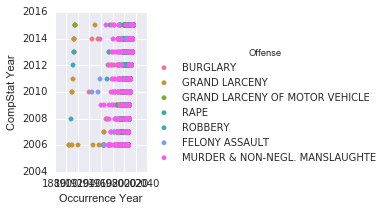

In [140]:
plt.figure(figsize = (10, 8))
fg = sns.FacetGrid(data=crime, hue='Offense')
fg.map(plt.scatter, 'Occurrence Year', 'CompStat Year').add_legend()

In [144]:
crime.Offense.value_counts().index.tolist()

['GRAND LARCENY',
 'ROBBERY',
 'BURGLARY',
 'FELONY ASSAULT',
 'GRAND LARCENY OF MOTOR VEHICLE',
 'RAPE',
 'MURDER & NON-NEGL. MANSLAUGHTE']

In [145]:
colors = ['blue', 'black', 'purple', 'orange', 'green', 'red', 'pink']

In [146]:
colormap = dict(zip(crime.Offense.value_counts().index.tolist(), colors))

In [153]:
colormap[np.nan] = 'white'

In [154]:
colors_list = map(lambda x: colormap[x], crime.Offense.tolist())

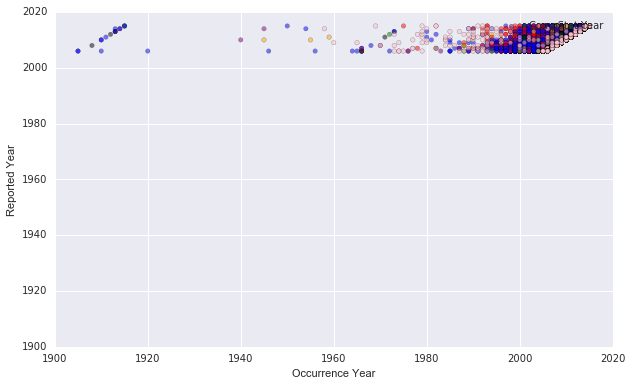

In [157]:
plt.figure(figsize = (10, 6))
plt.scatter(crime['Occurrence Year'], crime['CompStat Year'], alpha = 0.5, c = colors_list)
plt.xlabel('Occurrence Year')
plt.xlim(1900, 2020)
plt.ylim(1900, 2020)
plt.ylabel('Reported Year')
plt.legend(loc = 'best')
plt.show()

KeyboardInterrupt: 

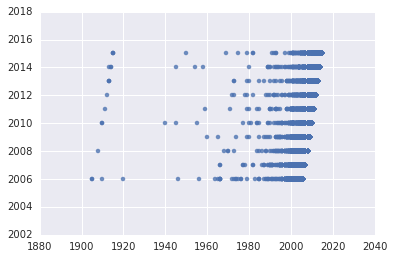

In [96]:
sns.regplot(x = 'Occurrence Year', y = 'CompStat Year', data = crime)